# Analysis of chocolatebar rating

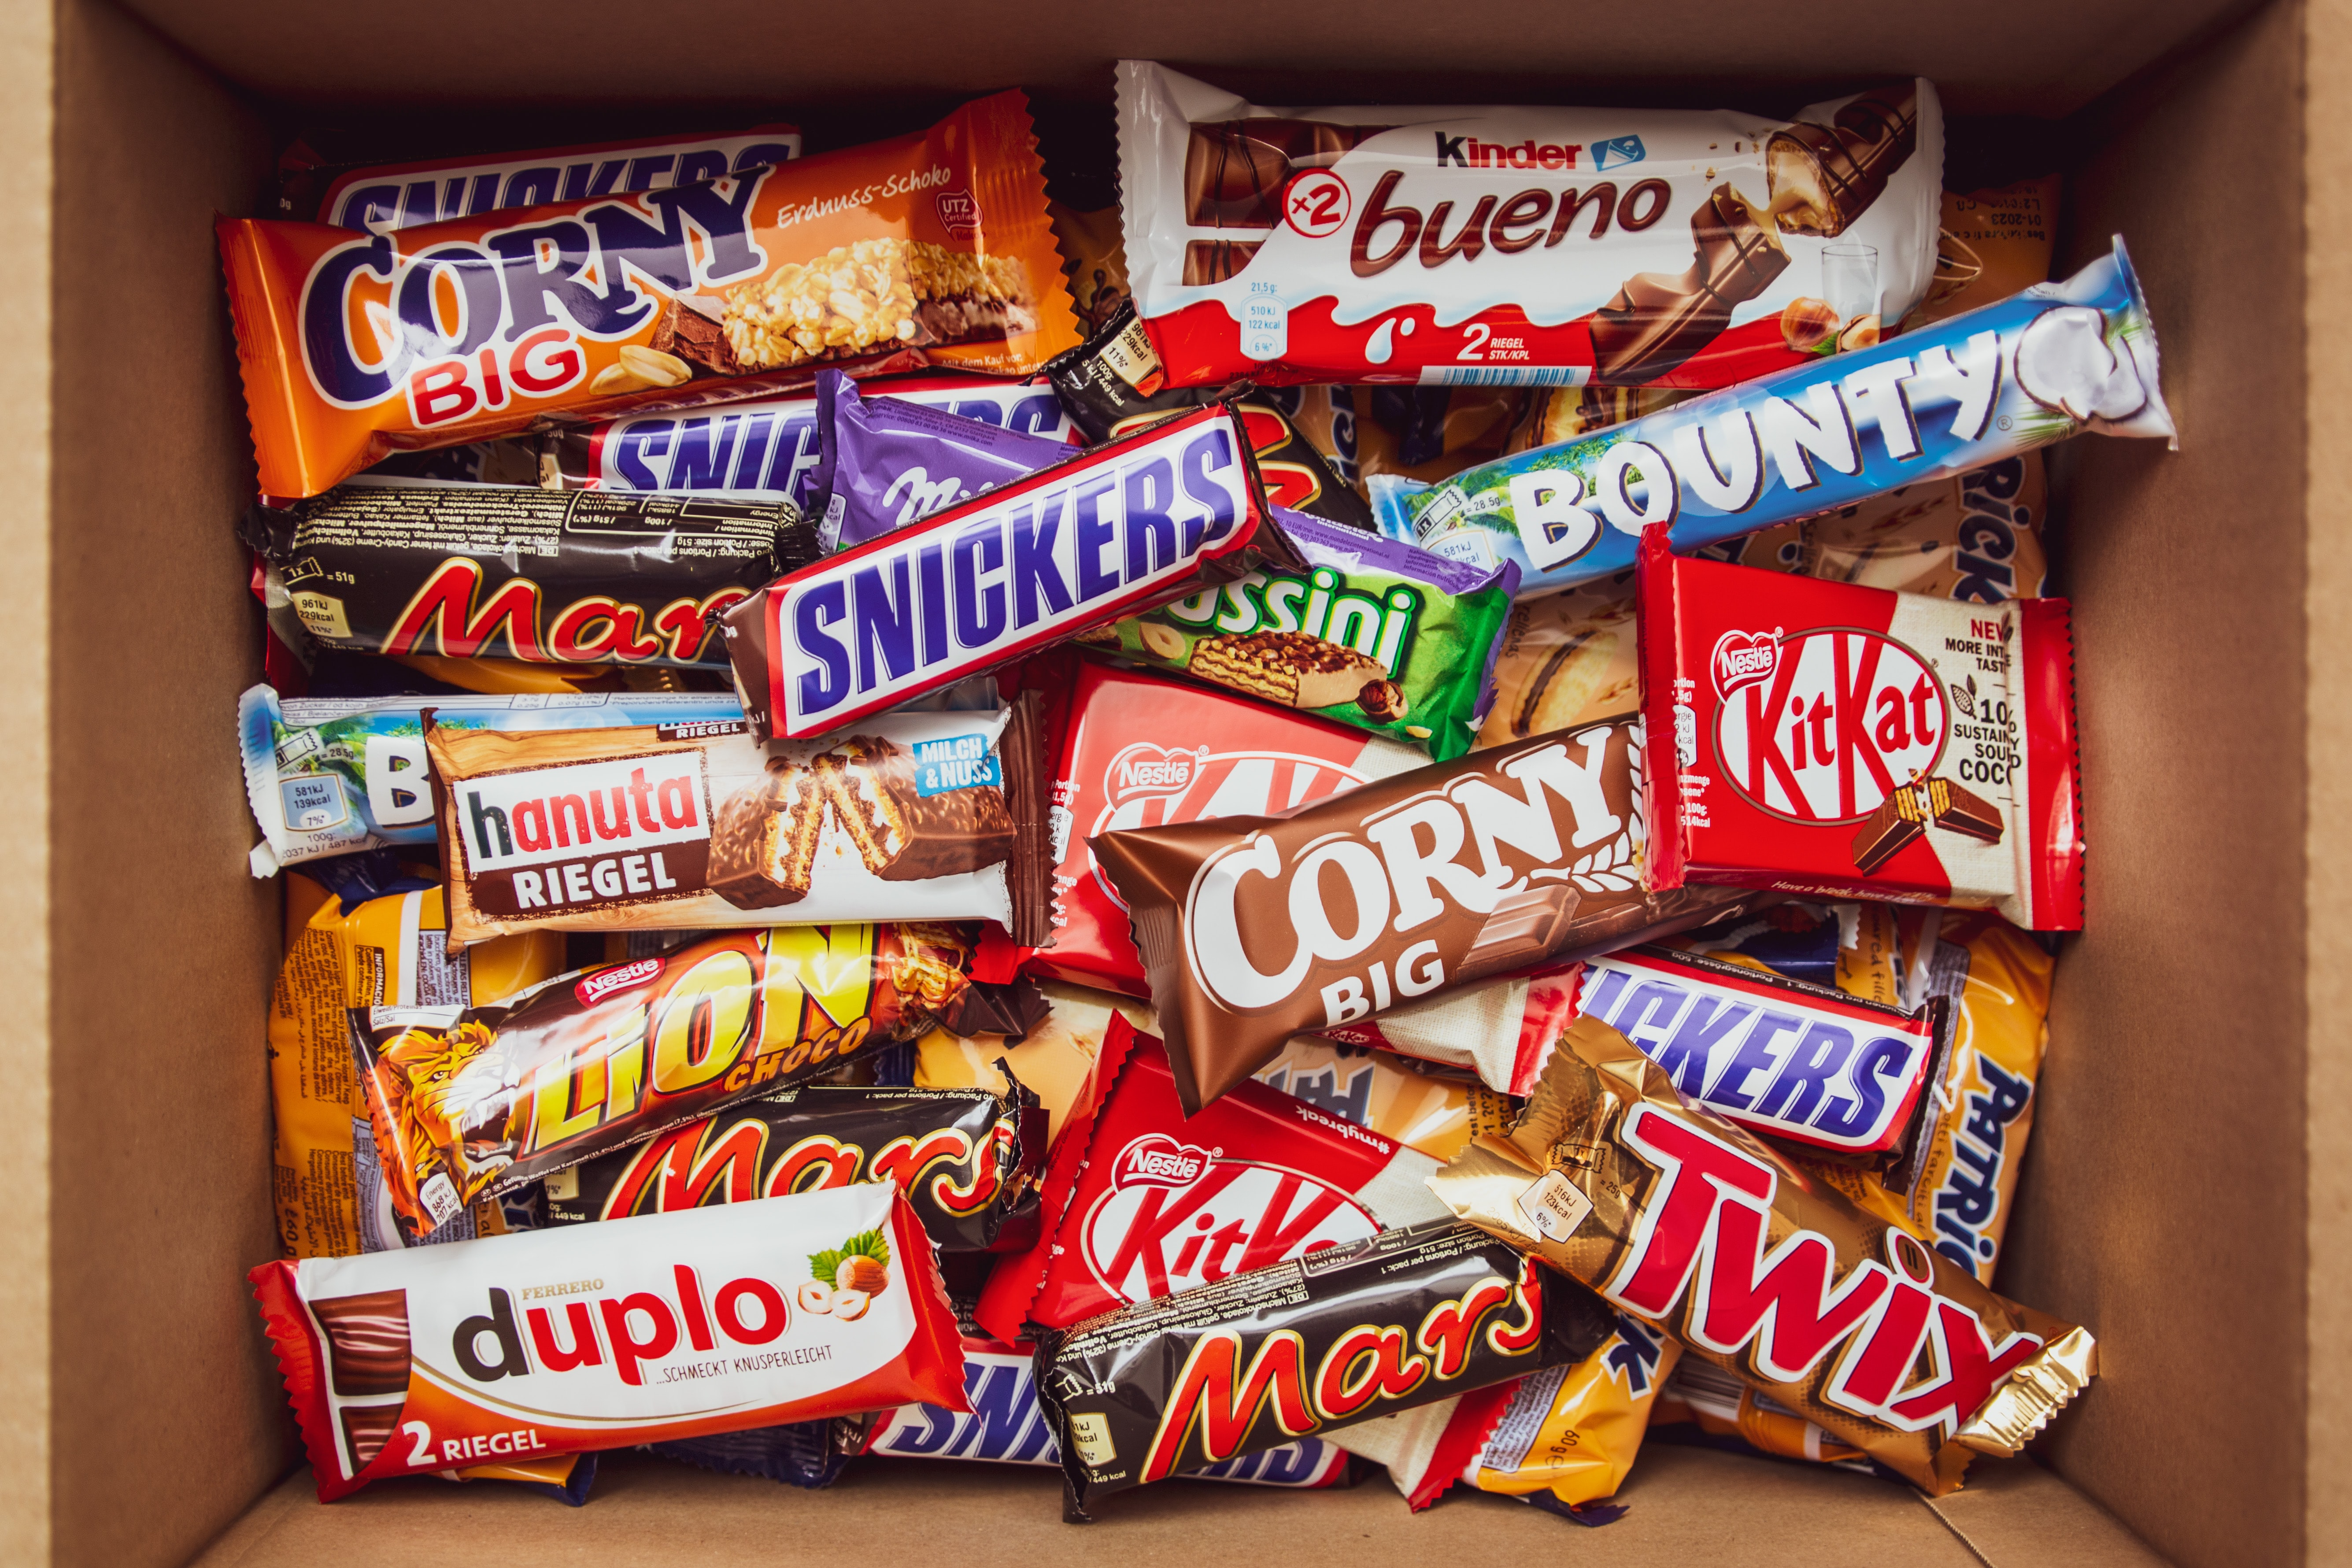

### import libraries

In [1]:
import  numpy as np
import pandas  as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### read the dataset ino a variable 

In [4]:
choco = pd.read_csv(r"choco\flc.csv")

### check the DataFrame

In [28]:
choco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
 9   Coco%                             1795 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 140.4+ KB


#### From the above Data The Coca Percentage and Rating seems to be important Features.

In [5]:
#check the datatype

In [6]:
choco["Cocoa\nPercent"].dtype

dtype('O')

#### I want to check the The correlation between the Coca percentage and rating of the chocolate but the required colomn is consisting of  Objects ,So inorder to perform furthur Operations on Data,We need to convert the Objects into Float.

In [7]:
choco["Rating"].dtype

dtype('float64')

In [8]:
#data manupulating

In [9]:
ds = choco["Cocoa\nPercent"].str.rstrip("%").astype(float)

In [10]:
ds

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: Cocoa\nPercent, Length: 1795, dtype: float64

##### Now  Add the Manupulated data into the Dataset and Remove the old Colomn .

In [11]:
#adding the cleaned data into the dataset

In [12]:
choco["Coco%"] = ds

In [13]:
choco

Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                      A. Morin                       Agua Grande  1876   
1                      A. Morin                             Kpime  1676   
2                      A. Morin                            Atsane  1676   
3                      A. Morin                             Akata  1680   
4                      A. Morin                            Quilla  1704   
...                         ...                               ...   ...   
1790                     Zotter                              Peru   647   
1791                     Zotter                             Congo   749   
1792                     Zotter                      Kerala State   749   
1793                     Zotter                      Kerala State   781   
1794                     Zotter                Brazil, Mitzi Blue   486   

      Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0             2016            63%            France    3.75              
1             2015            70%            France    2.75              
2             2015            70%            France    3.00              
3             2015            70%            France    3.50              
4             2015            70%            France    3.50              
...            ...            ...               ...     ...        ...   
1790          2011            70%           Austria    3.75              
1791          2011            65%           Austria    3.00  Forastero   
1792          2011            65%           Austria    3.50  Forastero   
1793          2011            62%           Austria    3.25              
1794          2010            65%           Austria    3.00              

     Broad Bean\nOrigin  Coco%  
0              Sao Tome   63.0  
1                  Togo   70.0  
2                  Togo   70.0  
3                  Togo   70.0  
4                  Peru   70.0  
...                 ...    ...  
1790               Peru   70.0  
1791              Congo   65.0  
1792              India   65.0  
1793              India   62.0  
1794             Brazil   65.0  

[1795 rows x 10 columns]

In [14]:
#droping the old data of Coco%

In [ ]:
choco.drop(["Cocoa\nPercent	"],axis =1 ,inpace =True)

In [35]:
choco.to_csv("choco/f2.csv")

## Plots

<AxesSubplot:xlabel='Coco%', ylabel='Rating'>

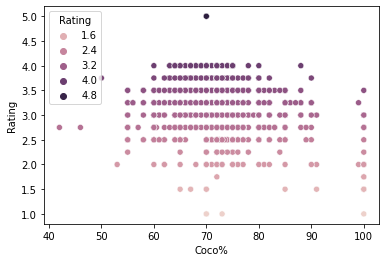

In [27]:
sns.scatterplot(data = choco , x = "Coco%" , y= "Rating",hue = "Rating")


<AxesSubplot:xlabel='Coco%', ylabel='Rating'>

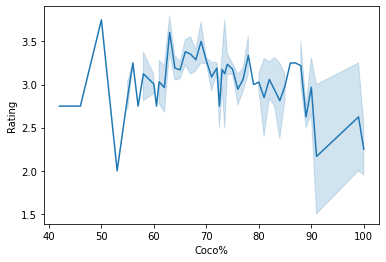

In [16]:
sns.lineplot(data = choco , x= "Coco%" , y= "Rating",palette="pastel")

#### From the Above Two Graphs we can Observe some of the following Keypoints :
- No Chocolate with 100% Coca have crossed the 3.5 Rating mark
- The Region between 60% - 80% seems to be a Safe spot .
- And 55% - 70% Seems to be a sweet spot.
- 70% is the most volatile region , Because it has chocolates with the lowest Rating of 1 star and highest Rating of 5 Star.

<AxesSubplot:xlabel='Rating', ylabel='Coco%'>

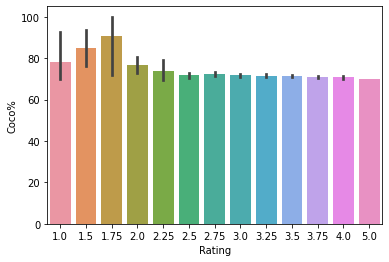

In [19]:
sns.barplot(data = choco , x = "Rating" , y= "Coco%")

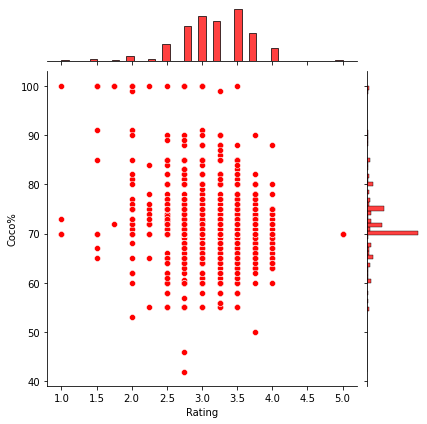

In [24]:
sns.jointplot(y= "Coco%",x = "Rating",data = choco,color="red" )

C:\Users\sandhya rani\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


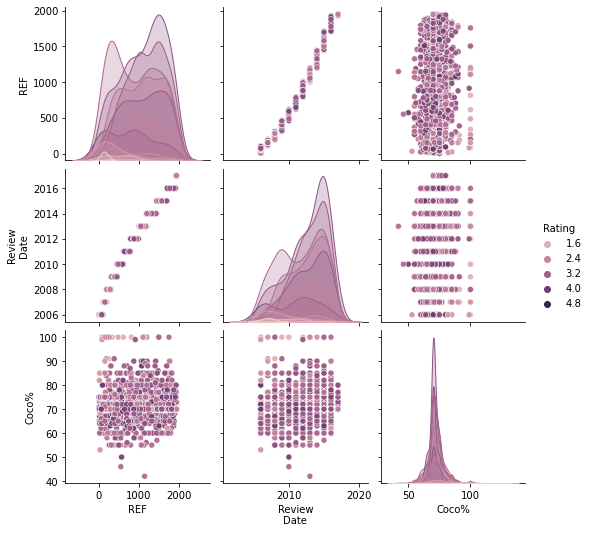

In [21]:
sns.pairplot(choco,hue = "Rating")

<AxesSubplot:xlabel='Coco%', ylabel='Rating'>

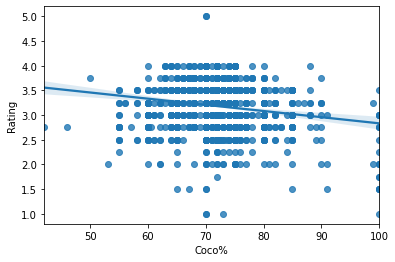

In [14]:
sns.regplot(data = choco,x = "Coco%" , y= "Rating" )

## Observation

### From the above regression plot , we can observe that the slope of the best fit line is negative , which means if Cocoa% in the chocolate increases then rating of the chocolate decreases , which brings us to a conclusion that people are not liking pure Coca chocolates .